<style id='Notebook Preview Styling & Formatting'>
h1 {
  font-size:40px;
}
.Author {
  color: blue;
  font-size: 22px;
}
h2{
  font-size: 22px;
}
table {
  font-size: 18px;
  text-align: center;
}
.Bold {
  font-weight: bold;
}
.Thin {
  font-weight: lighter;
}
p {
  font-size: 8px;
  color: transparent;
}
.Smaller {
  font-size: 13px;
}
.Smaller-Thin {
  font-size: 13px;
  font-weight: lighter;
}
.Italic {
  font-style: italic;
}
.Smaller-Italic {
  font-size: 13px;
  font-style: italic;
}
</style>

<h1> Multipurpose Financial Data Processor (MFDP)</h1>
<h2>Author: Reid Clark, Updated: February 11, 2024</h2>
<p class='Hidden Element'>                   BLANK SPACE                                                       </p>
<h2> Functionalities: </h2>
<hr>
<h2 class='Author'> 1. Market Volatility Forecasting </h2>
<h2> Uses a Generalized 'ARCH' Regression Model, 'GARCH' (Autoregressive Conditional Heteroskedacity), to compare (A), Historical Price Data, against (B), Past Price Change per Period (Volatility) Data. The MFDP applies GARCH to produce Expected Volatility Forecasts, attempting to predict future Price Targets (based on Past Volatility), then calculates Upper and Lower Bounds, based on an adjustable/user-specified Margin of Safety, to act as Warning Bounds.<h2>
<h2>Buy or Sell Warnings are issued when Live Prices meet or surpass either of the Bounds, indicating that (a) the stock has become unexpectedly inflated due to extraneous events (and should thus be sold to capture the spike and exit) or (b) the stock is selling for lower than expected (and should be purchased).</h2>
<h2 class='Author'> 2. Machine Econometrics & Moat Analysis</h2>
<h2> For the first time ever, the MFDP allows you to quantify one's traditional qualitative economic analysis (Beta); input your own score (between 0 and 1) for a range of parameters including brand strength, economic outlook, threat of substitues, industry outlook, and more. The MFDP can factor this information in to help further accurize results for future price targets; this will help identify wether or not stocks of interest have a sufficient moat, and are a brand of strength (to invest in). Adjust Margin of Safety based on given (adjustable) coefficients for economic factors.
<h2>
<h2 class='Author'> 2. Real-Time Fundamental Analysis </h2>
<h2> Web Scrapes Live NYSE, TSX, LSE, TSE Data through Finance Database API Calls to produced most up-to-date financial measures (ex. P/E).</h2>
<p class='Hidden Element'>                   BLANK SPACE                                                       </p>
<p class='Hidden Element'>                   BLANK SPACE                                                       </p>
<p class='Hidden Element'>                 TABLE OF CONTENTS                                                 </p>
<table id='Table of Contents'>
    
  <tr id='Row 1 - Table of Contents'>
      <td class='Bold' colspan="2">Table of Contents</td>
    </tr>

  <tr id='Row 2 - Table of Contents'>
      <td>-</td>
      <td>About (Capabilities)</td>
    </tr>

  <tr id='Row 3 - Table of Contents'>
      <td>Sec. 1</td>
      <td class='Thin'>View Demo Test Results from the MFDP Here for Alimentation Couche-Tard (ATD.TO), Period = ?</td>
    </tr>

  <tr id='Row 4 - Table of Contents'>
      <td>Sec. 2</td>
      <td class='Thin'>View the MFDP Raw Code for Manual Valuation Calculations</td>
    </tr>

  <tr id='Row 5 - Table of Contents'>
      <td>Sec. 3</td>
      <td class='Thin'>View the MFDP Raw Code for GARCH Model (Generalized Autoregressive Conditional Heteroskedasticity) (Demo)</td>
    </tr>

</table>

<p class='Hidden Element'>                   BLANK SPACE                                                       </p>

<table id='About (Capabilites)'>
  <tr>
    <td class ='Bold'>About (Capabilities)</td>
  </tr>
  <tr>
    <td class='Thin'>
    <bul class='BULLET'>
    Fetch Live (Per Second) Stock Data from NYSE, NASDAQ, LSE and TSE via Yahoo Finance Web API
    <bul>
    </td>
  </tr>
  <tr>
    <td class='Thin'>Calculate Current Valuation Measures for Fundamental Analysis</td>
  </tr>
    <td class='Thin'>Predict Market Volatility with GARCH Regression Model & Forecasting for Predictive Price Targets</td>
  </tr>
  <tr>
    <td class='Thin'>Live Data Visualization for Cluster Bounds Graphing</td>
  </tr>
  <tr>
    <td class='Thin'>Sample Txt</td>
  </tr>
</table>

<p class='Hidden Element'>                   BLANK SPACE                                                       </p>

# Instructions:
---
### Modify the following parameters (ticker, period, market index (default = S&P 500)):

In [17]:
ticker_input = 'AC.TO'
period_input = '1y'
market_index_input = '^GSPC'

Ticker Name: AC.TO
Date of Most Recent Info: 2022-12-31
Diluted EPS: -4.75
Weighted Average Cost of Capital (WACC): 9.64%
Industry Returns for Period 1y: 6.15%
Enterprise Value: $20,416,741,304.07
Estimated Intrinsic Value: -$6,809,258,695.93
Current Price: $18.98
Implied Share Price: -$19.00
Acceptable Buy Price Given Margin of Safety (0.30 or 30%): -$13.30
Sell


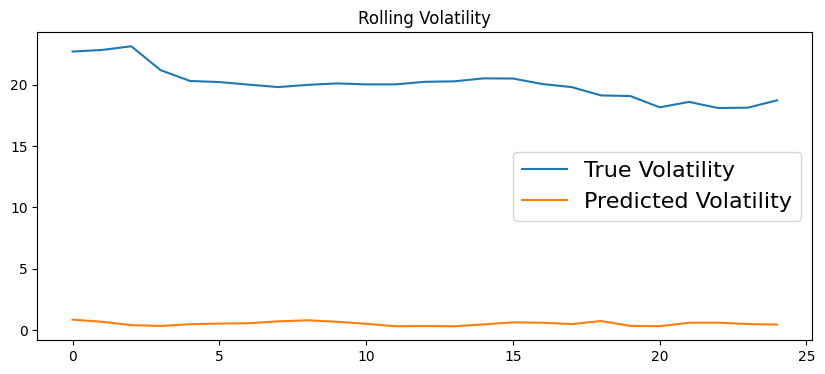

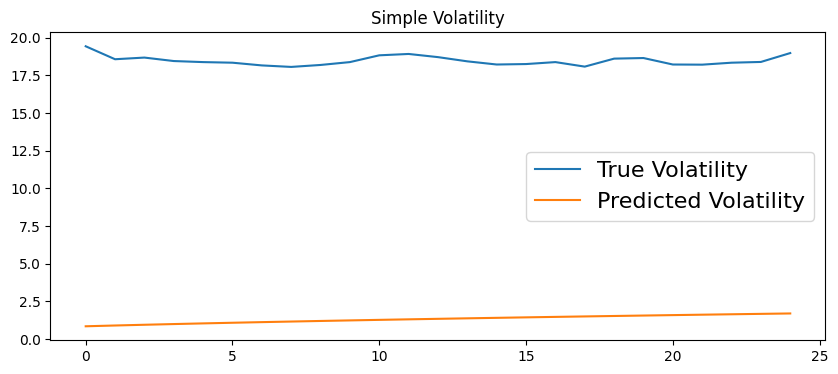

In [18]:
import ipywidgets as widgets
from ipywidgets import interact, Button
from IPython.display import display, HTML

import numpy as np
import pandas as pd
import pandas_datareader as web
## Set no limit in number of rows / columns displayed for large datasets of stocks:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests
# Fetch TwelveData Earnings Data
#api_key = '1cd34981158f47d2933af4113984b78a'
#endpoint = f'https://api.twelvedata.com/earnings?symbol={ticker_input}&apikey={api_key}'
#getreq = requests.get(endpoint)
#if getreq.status_code == 200:
#    parsed_data = getreq.json()
#print(parsed_data)

from datetime import datetime, timedelta
from decimal import Decimal
import locale
## Format values as $USD
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

import math
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

import yfinance as yf
import yahoo_fin.stock_info as si

def moat_finder():
    # Restate basic values
    restated_tickr = yf.Ticker(ticker_input)

    # Economic Factors
    # Rating between 0 - 1

    # (1) Brand strength (brand identity), (2) current economies of scale (within base(s) of operations),...
    # ... (3) future economies of scale (--), (4) regulatory barriers (score high if low barriers),...
    # ... (5) high switching costs for customers, (6) expected future theme relevance (industry expansion),...
    # ... (7) current threat/availability of substitutes, (8) expected future threat/availability of substitutes,...
    # ... (9) management quality (note: may ajust results more powerfully than other ratings, use lightly),...
    # ... (10) competitive positioning (compared to other industry rivals), (11) sustainability risk,...
    # ... (12) stock-to-industry deviation between wacc and market (industry) returns,
    
    conf_int = 0.1

    # (Additional) rt risk alpha variable (can elect to apply to multiply the overall risk for a chosen group)...
    # ... can group items in optional_risk_grouper.
    risk_alpha_variable = 1.1
    optional_risk_grouper = []

    rt_brand_strength = 0.5 # 1 = strongest possible brand identity
    rt_curr_econ_of_scale = 0.5 # 1 = highest possible current expansion potential based on economy of scale
    rt_futr_econ_of_scale = 0.5 # 1 = highest possible expected expansion potential based on economy of scale
    rt_abs_reg_barr = 0.5 # 1 = lowest possible regulatory barriers
    rt_switch_cost = 0.5 # 1 = highest possible switching costs for customers
    rt_future_theme = 0.5 # 1 = highest certainty of future industry expansion
    rt_curr_subst_threat = 0.5 # 1 = lowest possible current threat of substitutes
    rt_futr_subst_threat = 0.5 # 1 = lowest possible future threat of substitutes
    rt_sustainability_risk = 0.5 # 1 = lowest possibe threat of sustainable / environmental impacts on bizops
    rt_deviation_of_wacc_to_industry_returns = 0.5 # 0.5 = comparable to market (within 'x' amount)

    # RT FINANCIAL PERFORMANCE. 
    # Revenue growth, profit margins, ROIC, free cash flow gen. Consistent & Above average = strong moat

def garch():
    def garchgrapher():
        # Plot Rolling Vol.
        plt.figure(figsize=(10,4))
        plt.title('Rolling Volatility')
        true, = plt.plot((np_yf_cvals[:-test_size-i])[:len(rolling_predictions)])
        preds, = plt.plot(rolling_predictions)
        plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)
        
        # Plot Simple Vol.
        plt.figure(figsize=(10,4))
        plt.title('Simple Volatility')
        true, = plt.plot(np_yf_cvals[-test_size:])
        preds, = plt.plot((np.sqrt(predictions.variance.values[-1,:])))
        plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)
    
    # Part 2 - GARCH #
    # Reset close vals to ensure data sufficiency
    yf_ticker = yf.Ticker(ticker_input)
    yf_hist = yf_ticker.history(period=(period_input))
    pd_yf_hist = pd.DataFrame(yf_hist)
    yf_cvals = pd_yf_hist['Close']
    np_yf_cvals = np.array([yf_cvals][0])

    # Unhash below to show PCAF plot
    #plot_pacf(np_yf_cvals**2)
    #plt.show()

    # Establish variables
    n = len(np_yf_cvals)
    omega = 0.5
    alpha_1 = 0.1
    alpha_2 = 0.2
    beta_1 = 0.3
    beta_2 = 0.5

    # Compress results for n to scale large data
    test_size = int(n*0.1)

    # Create loop to identify volatilities (vols). Append vols to list.
    vols_list = [1,1]
    for i in range(n-1):
        vol = np.sqrt(omega + alpha_1*np_yf_cvals[-1]**2 + alpha_2*np_yf_cvals[-2]**2 + beta_1*vols_list[-1]**2 + beta_2*vols_list[-2]**2)
        vols_list.append(vol)

    # Train model
    train, test = np_yf_cvals[:-test_size], np_yf_cvals[-test_size:]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    
    ## Simple Volatility Forecast
    predictions = model_fit.forecast(horizon=test_size)

    ## Rolling Volatility Forecast
    rolling_predictions = []
    for i in range(test_size):
        train = np_yf_cvals[:-(test_size-i)]
        model = arch_model(train, p=1, q=1)
        model_fit = model.fit(disp='off')
        pred = model_fit.forecast(horizon=1)
        rolling_predictions.append((np.sqrt(pred.variance.values[-1,:][0])))
    
    garchgrapher()

def start_function():

    ## Currency formatter function
    def currency_formatter(value):
        return locale.currency(value, grouping=True)

    # Part 1 - Fundamental Analysis #
    def main():
        def all():
            ## Sample Stock Input: Apple / AAPL
            stock1 = yf.Ticker(ticker_input)
            ## String slice & print
            print(f'Ticker Name: {ticker_input}')

            ## Set "S&P 500 Index" as the Industry Sector for all Beta Calculations
            market_index = yf.Ticker(market_index_input) # ...so S&P 500 only

            def main_body():
                def wacc_and_related():
                    def dcf_model():
                        def enterprise_valuator():
                            
                            ## Find enterprise value
                            ent_val = mkt_cap + total_debt - cash_and_ce

                            ## Calculate equity value of ticker (convert from ent_val)
                            equity_val = mkt_cap + cash_and_ce - total_debt
                            
                            ## Find Implied Share Price
                            implied_share_price = equity_val / no_of_shares

                            ## Print Current price
                            ## Print ISP
                            print(f'Enterprise Value: {currency_formatter(ent_val)}')
                            print(f'Estimated Intrinsic Value: {currency_formatter(equity_val)}')
                            print(f'Current Price: {currency_formatter(current_price)}')
                            print(f'Implied Share Price: {currency_formatter(implied_share_price)}')

                            ## Find pct difference between current price and implied share price
                            dif = (current_price/implied_share_price)

                            ## Establish Margin of Safety
                            mrg_of_sfty = 0.30

                            acceptable_buy_price = (1 - mrg_of_sfty)*implied_share_price
                            print(f'Acceptable Buy Price Given Margin of Safety (0.30 or 30%): {currency_formatter(acceptable_buy_price)}')

                            if current_price > acceptable_buy_price:
                                print('Sell')
                            #ROUND HOLD TO NEAREST (BOUNDS)
                            elif current_price == acceptable_buy_price:
                                print('Hold')
                            else:
                                print('Buy')

                        ## Discounted Cash Flow Model Calculator
                        ## 1) Find FCF (Free Cash Flow)
                        fcf = cashflow_st['Free Cash Flow']

                        ## 2) Calculate Market Growth Rate. ('*2' as it is a ...
                        ## ... 6mo period. 'iloc' for more-accurate integer key (less output text desc.)
                        annual_g = (market_returns.iloc[-1] - market_returns.iloc[0])*2
                        
                        ## 3) Calculate Terminal Value using Perpetuity Growth Method
                        perp_growth_terminal_val = (fcf * (1 + annual_g)) / (wCoC - annual_g)

                        ## 4) Calculate Enterprise Value (ent_val)
                        enterprise_valuator()

                    ## Calculate WACC (wCoC)
                    wCoC = ((erp * beta) + rf) + cost_of_debt
                    final_wacc = wCoC*100
                    print(f'Weighted Average Cost of Capital (WACC): {round((final_wacc),2)}%')

                    ## Calculate industry returns for period
                    print(f'Industry Returns for Period {period_input}: {round((variance_of_market*100000),2)}%')

                    ## Call DCF discounted cash flow model calculator
                    dcf_model()
                

                ## Find bal sheet, income statement & cashflow stmt for ticker
                scraped_dates = (stock1.balance_sheet.iloc[0]).index
                bal_sheet_date = (str(scraped_dates[0]))[:10]
                print(f'Date of Most Recent Info: {bal_sheet_date}')
                bal_sheet = stock1.balance_sheet[bal_sheet_date]
                inc_st = stock1.income_stmt[bal_sheet_date]
                cashflow_st = stock1.cashflow[bal_sheet_date]
                df_cashflow_st = pd.DataFrame(cashflow_st)

                ## Find EPS
                eps = inc_st["Diluted EPS"]
                print(f'Diluted EPS: {eps}')

                ## Find market cap & no. of shares for ticker
                mkt_cap = stock1.basic_info['marketCap']
                no_of_shares = bal_sheet['Ordinary Shares Number']
                
                ## Gather 6mo recent close value history for ticker,...
                ## ...arrange close values in pandas dataframe
                stock1_info = stock1.history
                df_stock1_info = pd.DataFrame(stock1_info(period=(period_input)))
                stock1_cvals = df_stock1_info['Close']
                
                ## Find Current Price
                current_price = stock1_cvals.iloc[-1]

                ## Find P/E
                pe_ratio = current_price / eps

                ## Gather 6mo recent close value history for market index...
                ## ...performance, ditto above
                ## arrange close values in pandas dataframe again
                market_data = market_index.history(period=(period_input))
                df_market_data = pd.DataFrame(market_data)

                ## Calculate stock and market returns (pct change) for ticker
                stock1_returns = (stock1_cvals.pct_change().dropna())
                market_returns = df_market_data['Close'].pct_change().dropna()
                
                ## Check if difference
                ## Equalized if different number of items
                ## Append to final list
                difference = int(len(stock1_returns) - len(market_returns))
                stock1_returns_equalized = []
                market_returns_equalized = []
                
                if difference > 0:
                    stock1_returns_equalized = stock1_returns.iloc[:-difference]
                    market_returns_equalized = market_returns
                elif difference < 0:
                    stock1_returns_equalized = stock1_returns
                    market_returns_equalized = market_returns.iloc[-difference:]
                else:
                    stock1_returns_equalized = stock1_returns
                    market_returns_equalized = market_returns

                ## Calculate covariance & variance of returns (ticker v market)
                ## MODIFY TO ADJUST FOR EQUALIZED NUM!
                covariance = np.cov(stock1_returns_equalized, market_returns_equalized)[0,1]
                variance_of_market = np.var(market_returns_equalized)

                ## Calculate beta of ticker
                beta = covariance / variance_of_market

                ## Designate Equity Risk Premium (erp) for USA (based on S&P), 2024 rate (4.6%)
                erp = 0.046
                ## Designate Rf (Risk-Free Rate). Assume time period 20y. (4.22%)
                ## Treasury Info Link: https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2023
                rf = 0.0422
                ## Designate Rm (Expected Market Return). Assume 8% (based on S&P Historical)
                rm = 0.08

                ## The below is possibly needed in the future
                ## Calculate Cost of Equity (Re)
                cost_of_equity = rf + beta * (rm - rf)

                ## Find total assets, debt, and liabilities. calc future debt:
                total_assets = bal_sheet['Total Assets']
                total_debt = bal_sheet['Total Debt']
                total_liabilities = bal_sheet['Total Liabilities Net Minority Interest']
                future_debt = (bal_sheet['Total Non Current Liabilities Net Minority Interest']) \
                                + (bal_sheet['Other Non Current Liabilities'])

                ## TOTAL EQUITY
                ## APIC Assume as $0 due to missing yfinance SoCI.
                cmn_stock = bal_sheet['Common Stock']
                cmn_stock_equity = bal_sheet['Common Stock Equity']
                treasury_stock = cmn_stock - cmn_stock_equity
                apic = bal_sheet['Capital Stock']
                retained_earnings = bal_sheet['Retained Earnings']
                ## Calc TE
                total_equity = cmn_stock + (apic*0) + retained_earnings + treasury_stock #+ oci 

                ## Calculate Market Value of Debt. Assume interest = rf above
                ## Also, assume 'n' (YTM) = 5, based on S&P typicals.
                ## Recall: CMVoD: pv = fv / (1+r)^n
                mkt_val_ofdebt = future_debt / (1+rf)**5
                ## Calculate Annual Interest Payment
                ## AIP = Total Debt x Interest Rate. Also assume interest = rf above
                ann_int_pmt = total_debt * rf
                ## Calculate Cost of Debt (Rd)
                cost_of_debt = ann_int_pmt / mkt_val_ofdebt

                ## Find weightages
                equity_weightage = (total_equity / mkt_cap) * 100
                debt_weightage = (total_debt / mkt_cap) * 100

                ## Find cash and cash equivalents
                cash_and_ce = bal_sheet['Cash And Cash Equivalents']

                ## Calculate debt ratio
                debt_ratio = total_debt / total_assets

                ## Call WACC_etc to begin technical analysis
                wacc_and_related()         

            main_body()

        all()
    main()

button = widgets.Button(description='Run Demo - AAPL Apple Inc.')
button.style.button_color = 'blue'
button.style.text_color = 'white'
button_container = widgets.HBox([button], layout=widgets.Layout(justify_content='center'))
display(button_container)

start_function()
garch()
moat_finder()

# GARCH(a,b) (Generalized Autoregressive Conditional Heteroskedasticity) Model Results
---

#### Print Model Results Summary (Accuracy) & Plot the PCAF (Partial Autocorrelation) of Historical Data to Identify GARCH Parameters.

In [19]:
# Reset close vals to ensure data sufficiency
yf_ticker = yf.Ticker(ticker_input)
yf_hist = yf_ticker.history(period=(period_input))
pd_yf_hist = pd.DataFrame(yf_hist)
yf_cvals = pd_yf_hist['Close']
np_yf_cvals = np.array([yf_cvals][0])

n = len(np_yf_cvals)
test_size = int(n*0.1)


train, test = np_yf_cvals[:-test_size], np_yf_cvals[-test_size:]
model = arch_model(train, p=1, q=1)
model_fit = model.fit(disp='off')
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -404.556
Distribution:                  Normal   AIC:                           817.112
Method:            Maximum Likelihood   BIC:                           830.812
                                        No. Observations:                  227
Date:                Wed, Feb 14 2024   Df Residuals:                      226
Time:                        19:07:56   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            18.8285  8.861e-02    212.498      0.000 [ 18.655, 19.002]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0902  3.467e-02      2.601  9.298e-03 [2.222e-02,  0.158]
alpha[1]       1.0000      0.101      9.940  2.795e-23   [  0.803,  1.197]
beta[1]        0.0000  9.232e-02      0.000      1.000   [ -0.181,  0.181]
==========================================================================

Covariance estimator: robust
"""

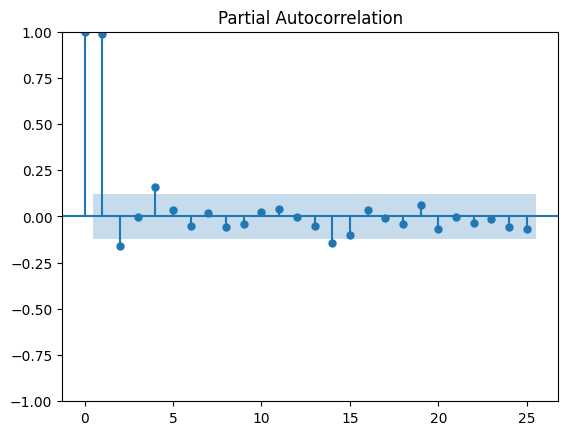

In [20]:
plot_pacf(np_yf_cvals**2)
plt.show()